# SMS Spam Collection

What is NLP?
=> Ability to make computer understand,analyze and manipulate human language.
Examples:
1) Auto complete option in Google 
2) Spam email detection in Gmail 
3) Autocorrect while typing messages in Android and iphone

NLP has below listed components:
    1) Topic Modeling
    2) Sentiment Analysis
    3) Sentence Segmentation
    
I will be using nltk for natural language processing

In [282]:
import numpy as np
import pandas as pd # For data manipulation
import nltk # For text manipulation
import re # For regular expression search
import string  # For Punctuation removal
from matplotlib import pyplot
%matplotlib inline


In [10]:
# Check what packages come with nltk
nltk.download()
dir(nltk)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

In [11]:
#Import stop words from nltk corpus
#Stop words are the words which are used very frequently in the text but does are not meaningful or does not provide any information 
#for further analysis
from nltk.corpus import stopwords


In [16]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
#read the text data.We can directly read this data using read csv pandas command with separater as \t 
#but in many cases when we don't know the structure of the data then we can read the file as below and see the structure
#and later on convert it to a dataframe
textdata=open("SMSSpamCollection").read()

In [29]:
#Note here we cannot use shape or head function to view the unstructured data as this data does not have any structure such as headers
# in it. To use these commands, we will create dataframe out of this info
textdata[0:1000]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\nham\tEven my brother is not like to speak with me. They treat me like aids patent.\nham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\nspam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [25]:
#Convert this data into list after replacing the separter \t with \n
newdata=textdata.replace('\t','\n').split('\n')

In [35]:
newdata[0:2]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [37]:
#Separate the label and text information from newdata
newlabel=newdata[0::2] #this will fetch all the labels from data i.e. spam and ham
newtext=newdata[1::2] # this will fetch all the text infor from the data

In [39]:
newlabel[0:5]

['ham', 'ham', 'spam', 'ham', 'ham']

In [40]:
newtext[0:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [48]:
#create dataframe using above information now
fulldata=pd.DataFrame({'label':newlabel,
                       'text':newtext})
#Once we run above command we will receive error as arrays must all be same length. This is bcuz newlist has one extra element
#at the end. So we can remove that element and proceed further


In [210]:
fulldata=pd.DataFrame({'label':newlabel[:-1],
                       'text':newtext})

In [211]:
fulldata.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
#Shape of data
fulldata.shape
#Dataset has two columns and 5574 rows
print("Data has {} rows and {} columns ".format(len(fulldata),len(fulldata.columns)))

Data has 5574 rows and 2 columns 


In [95]:
#Check the spam and ham in the data
print("There are {0:.2f}% spam and {1:.2f} % ham in the data".format((len(fulldata[fulldata['label']=='spam'])/len(fulldata)*100),
                                                            (len(fulldata[fulldata['label']=='ham'])/len(fulldata)*100)))
                                                                 

There are 13.40% spam and 86.60 % ham in the data


In [99]:
#Check the missing values
print(fulldata.isnull().sum())
print("There is no missing data in the dataset")

label    0
text     0
dtype: int64
There is no missing data in the dataset


Regex Methods

In [102]:
#For tokenization useful methods are:
#findall()
#split()
#Useful regex are
#'\W' or '\w'-- this will fetch only words from sentence removing whitespace, periods, slash etc
#'\S' or '\s' -- this will remove white space from sentence
#Above regex works for single char removal. To remove multiple at once use below
# '\S+' and similary add + to others
#Examples
#re.findall('[a-z]+',data) -- returns all small case texts in the data
#re.findal('[A-Z]+[0-9]+',data)-- returns string such as SAS9
#re.sub('[A-Z]+[0-9]+','This value is substitued',data) --used to substitute the value if found
#re.search()
#re.match()
#re.fullmatch()
#re.escape()
#re.findfilter()


# Text Data Preprocessing

In [114]:
 # Remove punctuation from the text
# For cleaning, I have used 2 different functions to remove stop words, punctuation and tokenization just for understanding purpose
#We can club all three functions and make one column
def remove_punc(text):
    text_nopunc=''.join([x for x in text if x not in string.punctuation])
    return text_nopunc


In [115]:
fulldata['cleantext']=fulldata['text'].apply(remove_punc)

In [119]:
fulldata.head()

,label,text,cleantext
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [128]:
 # Tokenization
def tokenize(text):
    token=re.split('\W+',text)
    return token
    

In [131]:
fulldata['tokentext']=fulldata['cleantext'].apply(lambda x: tokenize(x.lower()))
 # We have used lower here because python is case sensitive

In [132]:
fulldata.head(5)

,label,text,cleantext,tokentext
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [134]:
 # Stop words removal
stopword=nltk.corpus.stopwords.words('english')

In [136]:
def removestopwords(token):
    text=[word for word in token if word not in stopword]
    return text

In [139]:
fulldata['nostopword']=fulldata['tokentext'].apply(removestopwords)

In [140]:
fulldata.head(5)

,label,text,cleantext,tokentext,nostopword
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


# Stemming

In [142]:
 # Stemming: Reducing inflected words to their base form or crude practise to chop off the end of the word.
# Types of stemmer : Porter, Snowball, Lancaster, regex-based
# I have used Porter stemmer
# call porter stemmer from nltk
ps=nltk.PorterStemmer()


In [145]:
#Example of porter usage
print(ps.stem('Universe'))
print(ps.stem('university'))
print(ps.stem('universal'))

univers
univers
univers


In [147]:
def stemming(text):
    stemtext=[ps.stem(word) for word in text]
    return stemtext

In [150]:
fulldata['stemcol']=fulldata['nostopword'].apply(stemming)

In [152]:
fulldata.head(5)

,label,text,cleantext,tokentext,nostopword,stemcol
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


# Lemmatization

In [154]:
#reduce the word to its base form but that base has some meaning. Stemming is faster but lemmatization is more accurate
wn=nltk.WordNetLemmatizer()

In [156]:
#Example of lemmatizer usage
print(wn.lemmatize('Universe'))
print(wn.lemmatize('university'))
print(wn.lemmatize('universal'))

Universe
university
universal


In [162]:
#Example of lemmatizer usage
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))
print(ps.stem('goose'))
print(ps.stem('geese'))

goose
goose
goos
gees


In [164]:
def lemma(text):
    lemma=[wn.lemmatize(word) for word in text]
    return lemma

In [166]:
fulldata['lemmatext']=fulldata['nostopword'].apply(lemma)

In [168]:
fulldata.head(5)

,label,text,cleantext,tokentext,nostopword,stemcol,lemmatext
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


# Vectorizing

In [169]:
#Process of creating vectors(numeric form) from text so that they can be converted into feature vectors for machine learning
#Document term matrix is created. If there are 400 unique words, then there will be 400 unique columns in DT matrix.
#Three Types: 1) Count Vectorization 2) TF-IDF 3) N-grams

Count Vectorization

In [170]:
#below is the code for count vectorization although I am not going to use it 
#from sklearn.feature_extraction.text import CountVectorizer

#count_vect=CountVectorizer(analyzer= functionname) #here functionname is the function which involves step of removing pronunciation
#, stop words, lemmatizing or stemming
#X_counts=count_vect.fit_transform(data['body_text'])
#print(X_counts.shape())
#print(count_vect.get_feature_names())


N Gram vectorization : This type of vectorization also creates document term matrix. There will be rows equal to the number of unique sentences but instead of columns representing the single terms , they represent all combinations of adjacent words of length 'n' in the text.
Example :
"Data Science is interesting"
If n =2, then it is called bigram and tokens will have "Data Science", " Science is", "is interesting"
If n=3, then it is called trigram and tokens will have combinations of 3 adjacent words.
If n=4 then it is called four-geam and tokens will have combiantions of 4 words

In [175]:
#For n grams instead of individula words we need to pass a string so that it search for adjacent function. Hence we will create a 
# function to clean and tokenize and create a string which we can pass to n gram vectorizer
def clean_text1(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text= " ".join([ps.stem(word) for word in tokens if word not in stopword])
    return text

In [177]:
fulldata['cleaned_t']=fulldata['text'].apply(clean_text1)

In [178]:
fulldata.head(5)

,label,text,cleantext,tokentext,nostopword,stemcol,lemmatext,cleaned_t
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though


In [181]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect=CountVectorizer(ngram_range=(2,2))

In [183]:
X_counts=ngram_vect.fit_transform(fulldata['cleaned_t'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())
#Note DT matrix is sparse matrix which has more number of 0 elements

(5574, 31497)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

In [190]:
X_counts_df=pd.DataFrame(X_counts.toarray())
X_counts_df.columns=ngram_vect.get_feature_names()
X_counts_df

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,ãœ still,ãœ takin,ãœ thk,ãœ wait,ãœ wan,ãœ wana,ãœ want,ãœ write,ãœll take,œharri potter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF -- still created DT matrix where each row is text and each column is unique word but instead of count of that word
in the text, it represents the weight of the word i.e. how important is the word in that matrix
Weight of word = TF * log(N/df)
TF= number of times word w appears in text t divided by total number of words in text t
N= total number of documents
df= number of documents containign word w

In short, rare the word is, more weight it will have


In [298]:
def clean_text2(text):
    text=''.join([word.lower() for word in text if word not in string.punctuation])
    tokens =re.split('\W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopword]
    return text

In [299]:
#for tfidf we can send tokens instead of string.
from sklearn.feature_extraction.text import TfidfVectorizer


In [300]:
tfidf_vict=TfidfVectorizer(analyzer=clean_text2)
X_tfcount=tfidf_vict.fit_transform(fulldata['text'])
print(X_tfcount.shape)
print(tfidf_vict.get_feature_names())

(5574, 8153)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [301]:
#create df
tfdframe=pd.DataFrame(X_tfcount.toarray())
tfdframe.columns=tfidf_vict.get_feature_names()
tfdframe.tail(5)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zyada,¾ã,â,ã,ã¼,ã¼ll,ãœ,ãœll,œ,œharri
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.150215,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.356674,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [214]:
#Create features on raw data
# Calculate text length
fulldata['textlength']=fulldata['text'].apply(lambda x: len(x)-x.count(" ")) #x.count is used to remove whit spaces

In [216]:
fulldata.head()

,label,text,textlength
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [270]:
#Cal the % of punctuation in text
def count_punc(text):
    count=sum([1 for char in text if char in string.punctuation])
    per=len(text)-text.count(" ")
    return round((count/per)*100,2)

In [254]:
fulldata['puncpercent']=fulldata['text'].apply(count_punc)

In [256]:
fulldata.head(5)

,label,text,textlength,puncpercent
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.78
1,ham,Ok lar... Joking wif u oni...,24,25.00
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.69
3,ham,U dun say so early hor... U c already then say...,39,15.38
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.08


In [278]:
# Cal the number of capital letters in the text
def cal_capital(text):
    caps=sum([1 for char in text if char.isupper()])
    per=len(text)-text.count(" ")
    return round((caps/per)*100,2)

In [279]:
fulldata['Capscount']=fulldata['text'].apply(cal_capital)

In [281]:
fulldata.head()

,label,text,textlength,puncpercent,Capscount
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.78,3.26
1,ham,Ok lar... Joking wif u oni...,24,25.00,8.33
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.69,7.81
3,ham,U dun say so early hor... U c already then say...,39,15.38,5.13
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.08,4.08


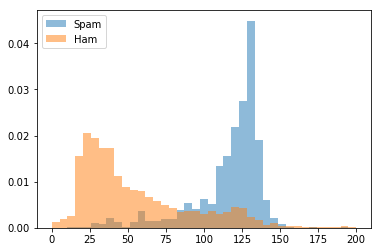

In [284]:
bins=np.linspace(0,200,40)# this will create array of 40 evenly spaced numbers between 0 and 200
pyplot.hist(fulldata[fulldata['label']=='spam']['textlength'],bins,alpha=0.5,normed= True,label='Spam') #alpha is for darkness of histogram
# bins is for histogram cut points
pyplot.hist(fulldata[fulldata['label']=='ham']['textlength'],bins,alpha=0.5, normed= True,label='Ham')
pyplot.legend(loc='upper left')
pyplot.show()

Spam text messages seems to be quite longer than ham messages

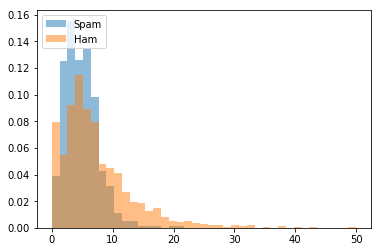

In [285]:
bins=np.linspace(0,50,40)# this will create array of 40 evenly spaced numbers between 0 and 200
pyplot.hist(fulldata[fulldata['label']=='spam']['puncpercent'],bins,alpha=0.5,normed= True,label='Spam') #alpha is for darkness of histogram
# bins is for histogram cut points
pyplot.hist(fulldata[fulldata['label']=='ham']['puncpercent'],bins,alpha=0.5, normed= True,label='Ham')
pyplot.legend(loc='upper left')
pyplot.show()

Not much difference in the punctuation of spam and ham

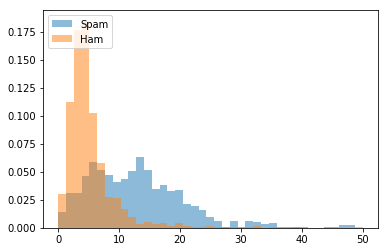

In [286]:
bins=np.linspace(0,50,40)# this will create array of 40 evenly spaced numbers between 0 and 200
pyplot.hist(fulldata[fulldata['label']=='spam']['Capscount'],bins,alpha=0.5,normed= True,label='Spam') #alpha is for darkness of histogram
# bins is for histogram cut points
pyplot.hist(fulldata[fulldata['label']=='ham']['Capscount'],bins,alpha=0.5, normed= True,label='Ham')
pyplot.legend(loc='upper left')
pyplot.show()

It seems spam messages have more number of capital characters than ham

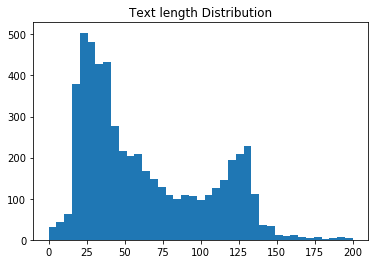

In [290]:
# Check the variables transformation
bins=np.linspace(0,200,40)
pyplot.hist(fulldata['textlength'],bins)
pyplot.title("Text length Distribution")
pyplot.show()

In [ ]:
This shows a bimodal distribution with two spikes for Text length. This is not heavily skewed.

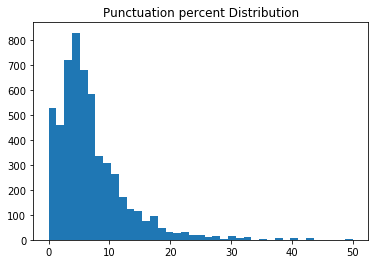

In [291]:
# Check the variables transformation
bins=np.linspace(0,50,40)
pyplot.hist(fulldata['puncpercent'],bins)
pyplot.title("Punctuation percent Distribution")
pyplot.show()

This graph is positively skewed and needs some transformation.It has few outliers as well

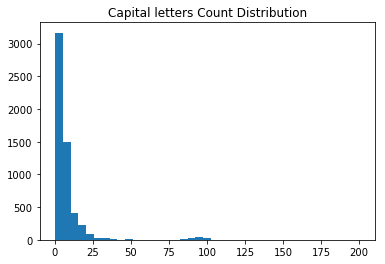

In [292]:
# Check the variables transformation
bins=np.linspace(0,200,40)
pyplot.hist(fulldata['Capscount'],bins)
pyplot.title("Capital letters Count Distribution")
pyplot.show()

This graph is positively skewed and needs some transformation. It has few outliers as well

# BoX Cox Transformation

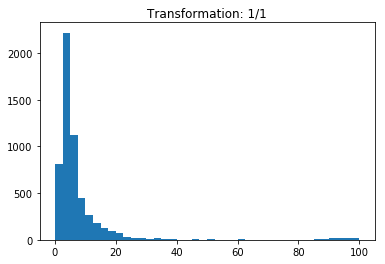

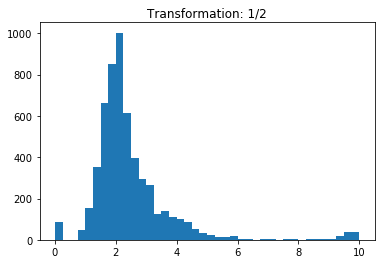

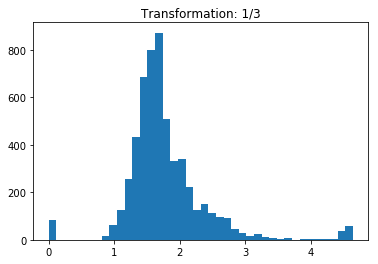

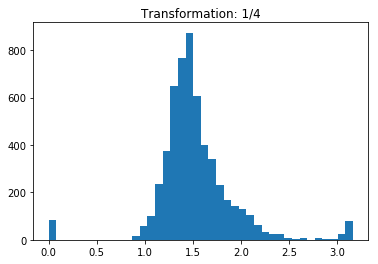

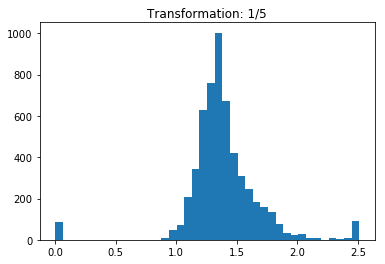

In [297]:
# Transformation makes the features clean for model to use. Examples : using log, square root, Box cox is y to power x where
#y is value in cell and x is the transforamtion value we apply
#apply for lop to check the various transformation
for i in [1,2,3,4,5]:
    pyplot.hist((fulldata['Capscount'])**(1/i),bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

# Modeling

In [302]:
#K fold cross validation : In this method, the full dataset is divided into k subsets. Each time, one of the k-subsets is used as the
#test set and the other k-1 subsets are put together to be used to train the model
# For example if we chose, n=5 then the whole dataset is divide into 5 subsets
# In 1st iteration, model will train using first 4 subset and evaluate on 5th subset and in 2nd
#iteration, model will train on 1,2,4,5 subset and evaluate on 3rd subset and so on and so forth.
#Evaluation Metrics
#Accuracy=#predicted correctly/total no. of observations
#Precision= #predicted as spam that are actually spam/total # predicted as spam(Things we say relevant)
#Recall = #predcited as spam when actually spam/total # that actually spam(Things that are actually relevant)
#if FP are really costly, then optimize model for precision and if FN are costly , the optomoze model for recall
# Random Forests is one type of ensemble method. Ensemble method is a technique that creates multiple models and then
#combines them to produce better results than any of the single models individually
#Random Forests constructs a collection of decision trees where each tree is idenpendent of each other and then aggregates the predictions 
#of each tree to determine the final prediction
#Advantages of RF:
#1) Can be used for both regression/classification
#2) handles outliers, missing values
#3) Accepts various types of input ordinal, nominal etc
#4) Less likely to overfit
#5) Generates feature importance score for each feature


In [327]:
#Prepare data for random forest
Rfdata=pd.concat([fulldata['textlength'],fulldata['Capscount'],fulldata['puncpercent'],tfdframe],axis=1)
#tfdframe

In [307]:
Rfdata.head(5)

,textlength,Capscount,puncpercent,,0,008704050406,0089mi,0121,01223585236,01223585334,...,zyada,¾ã,â,ã,ã¼,ã¼ll,ãœ,ãœll,œ,œharri
0,92,3.26,9.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,8.33,25.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,7.81,4.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,5.13,15.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.08,4.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
#Random Forest using cross validation
from sklearn.ensemble import RandomForestClassifier
print(RandomForestClassifier()) # shows hyperparameters of Random Forest
print(dir(RandomForestClassifier))# shows methods contained in Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predi

In [318]:
from sklearn.model_selection import KFold, cross_val_score

In [320]:
# instantiate Random Forest
rf=RandomForestClassifier(n_jobs=-1) #passing n_jobs=-1 will make decison trees in parallel so that algo will run faster

In [332]:
k_fold=KFold(n_splits=5)
cross_val_score(rf,Rfdata,fulldata['label'],cv=k_fold, scoring='accuracy',n_jobs=-1)

array([ 0.94170404,  0.95246637,  0.96233184,  0.93991031,  0.95332136])

In [335]:
#random Forest using train test split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Rfdata,fulldata['label'],test_size=0.2)

In [337]:
# instantiate Random Forest
rf=RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs=-1) #passing n_jobs=-1 will make decison trees in parallel so that algo will run faster

In [339]:
rf_model=rf.fit(X_train,Y_train)

In [343]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)

[(0.40810794796094269, 'textlength'),
 (0.39739171030361936, 'Capscount'),
 (0.19450034173543795, 'puncpercent')]

In [345]:
y_pred=rf_model.predict(X_test)

In [348]:
precision,recall,fscore,support=score(Y_test,y_pred,pos_label='spam',average='binary') #pos_label is we are xplaining model to which label we want info.Since
#we are concerned with spam, we passed spam


In [350]:
print("Precision:{}, Recall:{} , ".format(round(precision,2),round(recall,2)))

Precision:0.9, Recall:0.8 , 


Here Recall is 80%, that means our model has correctly identified 80% spam mails and still its not able to identify 20% spam.
90% precison means that out of all spam emails identified, 90% were accurate.

In [369]:
#Random Forest usign grid search
# Grid Search is exhaustively searching all parameter combinations in a given grid to determine best model
def train_rf(n_estimator,n_depth):
    rf=rf=RandomForestClassifier(n_estimators=n_estimator,max_depth=n_depth,n_jobs=-1)
    rf_model=rf.fit(X_train,Y_train)
    y_pred=rf_model.predict(X_test)
    precision,recall,fscore,support=score(Y_test,y_pred,pos_label='spam',average='binary')
    print("Est:{},Depth:{},Precision:{}, Recall:{} ".format(n_estimator,n_depth,round(precision,2),round(recall,2)))

In [370]:
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        train_rf(n_est,depth)

Est:10,Depth:10,Precision:0.85, Recall:0.78 
Est:10,Depth:20,Precision:0.91, Recall:0.74 
Est:10,Depth:30,Precision:0.88, Recall:0.76 
Est:10,Depth:None,Precision:0.91, Recall:0.78 
Est:50,Depth:10,Precision:0.88, Recall:0.78 
Est:50,Depth:20,Precision:0.88, Recall:0.78 
Est:50,Depth:30,Precision:0.9, Recall:0.78 
Est:50,Depth:None,Precision:0.9, Recall:0.78 
Est:100,Depth:10,Precision:0.88, Recall:0.78 
Est:100,Depth:20,Precision:0.88, Recall:0.78 
Est:100,Depth:30,Precision:0.88, Recall:0.78 
Est:100,Depth:None,Precision:0.89, Recall:0.8 


In [372]:
#Evaluate Model Performance
from sklearn.model_selection import GridSearchCV

In [382]:
rf=RandomForestClassifier()
param={'n_estimators':[10,150,300],'max_depth': [30,60,90,None]} #Setting hyperparameter for Grid selection and model tuning 
gs=GridSearchCV(rf,param,cv=5)
#Fitting the model to grid Search CV




In [387]:
gs_fit=gs.fit(Rfdata, fulldata['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]# Since the o/p of gs_fit is very messsy
#we created the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,3.583640,0.249978,0.955328,0.9939,90,300,"{'max_depth': 90, 'n_estimators': 300}",1,0.950717,0.994841,...,0.962298,0.993498,0.951526,0.993498,0.959605,0.993049,0.195679,0.012880,0.004701,0.000699
11,3.424098,0.230638,0.954790,0.9939,None,300,"{'max_depth': None, 'n_estimators': 300}",2,0.949821,0.994841,...,0.960503,0.993498,0.952424,0.993498,0.957810,0.993049,0.084865,0.010231,0.003846,0.000699
2,3.357230,0.233409,0.954611,0.9939,30,300,"{'max_depth': 30, 'n_estimators': 300}",3,0.950717,0.994841,...,0.960503,0.993498,0.951526,0.993498,0.957810,0.993049,0.022951,0.005418,0.003848,0.000699
1,1.714955,0.115533,0.954431,0.9939,30,150,"{'max_depth': 30, 'n_estimators': 150}",4,0.949821,0.994841,...,0.961400,0.993498,0.952424,0.993498,0.955117,0.993049,0.045105,0.001028,0.003882,0.000699
5,3.572641,0.246822,0.954431,0.9939,60,300,"{'max_depth': 60, 'n_estimators': 300}",4,0.949821,0.994841,...,0.962298,0.993498,0.950628,0.993498,0.957810,0.993049,0.124789,0.025789,0.004836,0.000699


Above we can see, mean test score and mean train score are almost on the similar range. And the best score is 
for parameters max depth as 90 and n estimators as 300

# Gradient Boosting

It is also an ensemble method which takes an iterative approach to combine weak learners to create a 
strong learner by focusing on mistakes of prior iterations. It also uses Decision Trees.
Difference between Random Forest and Gradient Boosting
1) RF uses bagging whereas gradient boosting is based upon boosting. Bagging and boosting both uses sampling of each decison tree
but bagging samples randomly whereas boosting samples based on the previous weight if the previous iteration went wrong.
2) Training is done parallely and hence are quick whereas boosting does iterative training as it relies on the weight of the
previous tree. If the previous tree got incorrect, it gives higher weight to it and hence, takes long to process.
3) Unweighted voting for final prediction in RF whereas boosting gives weighted voting for final prediction
4) RF are easier to tune, harder to overfit  and Boosting are harder to tune and easier to overfit

GB is very powerful if tunes properly

In [389]:
from sklearn.ensemble import GradientBoostingClassifier
print(GradientBoostingClassifier())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


GB does not has njobs parameter as GB does not train parallely. It trains iteratively as in it depends on previous DT output

In [391]:
#Random Forest usign grid search
# Grid Search is exhaustively searching all parameter combinations in a given grid to determine best model
def train_gb(n_estimator,n_depth,learningrate):
    gb=GradientBoostingClassifier(n_estimators=n_estimator,max_depth=n_depth,learning_rate=learningrate)
    gb_model=gb.fit(X_train,Y_train)
    y_pred=gb_model.predict(X_test)
    precision,recall,fscore,support=score(Y_test,y_pred,pos_label='spam',average='binary')
    print("Est:{},Depth:{},Precision:{}, Recall:{} , LR:{}".format(n_estimator,n_depth,round(precision,2),round(recall,2),learningrate))

In [392]:
for n_est in [50,100,150]:
    for depth in [3,7,11,14]:
        for lr in [0.01,0.1,1]:
            train_gb(n_est,depth,lr)
          

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est:50,Depth:3,Precision:0.0, Recall:0.0 , LR:0.01
Est:50,Depth:3,Precision:0.85, Recall:0.75 , LR:0.1
Est:50,Depth:3,Precision:0.77, Recall:0.74 , LR:1
Est:50,Depth:7,Precision:0.0, Recall:0.0 , LR:0.01
Est:50,Depth:7,Precision:0.86, Recall:0.76 , LR:0.1
Est:50,Depth:7,Precision:0.2, Recall:0.62 , LR:1
Est:50,Depth:11,Precision:1.0, Recall:0.01 , LR:0.01
Est:50,Depth:11,Precision:0.8, Recall:0.78 , LR:0.1
Est:50,Depth:11,Precision:0.8, Recall:0.76 , LR:1
Est:50,Depth:14,Precision:1.0, Recall:0.02 , LR:0.01
Est:50,Depth:14,Precision:0.76, Recall:0.75 , LR:0.1
Est:50,Depth:14,Precision:0.81, Recall:0.78 , LR:1
Est:100,Depth:3,Precision:0.87, Recall:0.57 , LR:0.01
Est:100,Depth:3,Precision:0.83, Recall:0.76 , LR:0.1
Est:100,Depth:3,Precision:0.77, Recall:0.75 , LR:1
Est:100,Depth:7,Precision:0.88, Recall:0.68 , LR:0.01
Est:100,Depth:7,Precision:0.85, Recall:0.79 , LR:0.1
Est:100,Depth:7,Precision:0.62, Recall:0.75 , LR:1
Est:100,Depth:11,Precision:0.82, Recall:0.72 , LR:0.01
Est:100,Dept

In [395]:
#Evaluate Model Performance
gb=GradientBoostingClassifier()
param={'n_estimators': [100,150],
       'max_depth':[7,11,15],
       'learning_rate':[0.1]    
}
gs=GridSearchCV(gb,param,cv=5)

In [397]:
cv_fit=gs.fit(Rfdata,fulldata['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.379152,0.018006,0.949587,0.993048,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1,0.944444,...,0.957810,0.992601,0.943447,0.992377,0.949731,0.991928,0.035125,0.000036,0.005297,0.000950
1,3.487609,0.024194,0.948870,0.993856,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",2,0.944444,...,0.957810,0.993498,0.944345,0.993498,0.947935,0.993049,0.151319,0.000391,0.004934,0.000642
2,6.464420,0.026033,0.945282,0.993900,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",3,0.940860,...,0.950628,0.993498,0.943447,0.993498,0.943447,0.993049,0.159238,0.000605,0.003533,0.000699
3,8.194576,0.035052,0.945282,0.993900,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",3,0.939964,...,0.951526,0.993498,0.944345,0.993498,0.943447,0.993049,0.160580,0.000875,0.003871,0.000699
4,5.952355,0.026223,0.937747,0.993900,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",5,0.934588,...,0.938061,0.993498,0.945242,0.993498,0.934470,0.993049,0.280971,0.001166,0.003971,0.000699


# Model Selection

Fit both the models on training set and predict test set. Thoroughly evaluate the results of both models to select best model

In [401]:
#Split the data into tran and test
X_train,X_test,y_train,y_test=train_test_split(fulldata[['text','Capscount','textlength','puncpercent']],fulldata['label'],test_size=0.2)

In [405]:
#Vectorize
tfidf_vect=TfidfVectorizer(analyzer=clean_text2)
tfidf_vect_fit=tfidf_vect.fit(X_train['text']) # we have vectorized only training set
tfidf_train=tfidf_vect_fit.transform(X_train["text"])
tfidf_test=tfidf_vect_fit.transform(X_test["text"])

In [406]:
X_train_vect=pd.concat([X_train[['textlength','puncpercent','Capscount']].reset_index(drop=True),pd.DataFrame(tfidf_train.toarray())],axis=1)

In [407]:
X_test_vect=pd.concat([X_test[['textlength','puncpercent','Capscount']].reset_index(drop=True),pd.DataFrame(tfidf_test.toarray())],axis=1)

In [408]:
X_train_vect.head(5)

,textlength,puncpercent,Capscount,0,1,2,3,4,5,6,...,7068,7069,7070,7071,7072,7073,7074,7075,7076,7077
0,126,10.32,5.56,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,50,14.00,6.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,22,9.09,9.09,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,106,9.43,12.26,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.154968,0.0,0.0,0.0,0.0,0.0
4,60,6.67,3.33,0.165267,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [410]:
#Final evaluation of models
import time #check model running timing
rf= RandomForestClassifier(n_estimators=150,max_depth=None,n_jobs=-1)

start=time.time()
rf_model=rf.fit(X_train_vect,y_train)
end=time.time()
fit_time=(end-start)


start=time.time()
y_pred=rf_model.predict(X_test_vect)
end=time.time()
pred_time=(end-start)

precision,recall,fscore,train_support=score(y_test,y_pred,pos_label='spam',average='binary') 
print("Predtime:{},fittime:{},Precision:{}, Recall:{}".format(round(pred_time,2),round(fit_time,2),
                        round(precision,2),round(recall,2)))

Predtime:0.37,fittime:11.24,Precision:1.0, Recall:0.81


In [ ]:
#Final evaluation of models
import time #check model running timing
gb= GradientBoostingClassifier(n_estimators=150,max_depth=11)

start=time.time()
gb_model=gb.fit(X_train_vect,y_train)
end=time.time()
fit_time=(end-start)


start=time.time()
y_pred=gb_model.predict(X_test_vect)
end=time.time()
pred_time=(end-start)

precision,recall,fscore,train_support=score(y_test,y_pred,pos_label='spam',average='binary') 
print("Predtime:{},fittime:{},Precision:{}, Recall:{}".format(round(pred_time,2),round(fit_time,2),
                       round(precision,2),round(recall,2)))